In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

In [71]:
df = pd.read_csv('metadata.csv')
df

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,...,Other_species23,Other_species24,Other_species25,Other_species26,Other_species27,Other_species28,Other_species29,Other_species30,Species,Path
0,356824,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"doñana visitable, sevilla, andalucía",37.1058,-6.2577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-356824.mp3
1,317951,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"arroyo algarbe, hinojos, huelva, andalucía",37.3006,-6.3783,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-317951.mp3
2,508571,Sonus,naturalis,NaN,Soundscape,Nelson Conceição,Portugal,"Santo Estêvão, Tavira, Faro",37.1554,-7.6960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-508571.mp3
3,448534,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"Córdoba, Córdoba, Andalucía",37.9321,-4.9446,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-448534.mp3
4,373414,Sonus,naturalis,NaN,Soundscape,Lars Lachmann,Germany,"Frohnau, Berlin, north-eastern part",52.6408,13.2956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-373414.mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2145,518681,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Daniele Baroni,Finland,"Nousis, Åbo, Southwest Finland",60.6657,22.2822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-518681.mp3
2146,401901,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Jarek Matusiak,Russian Federation,"Gmina Dubeninki, Nesterovsky District, Kalinin...",54.3490,22.6561,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-401901.mp3
2147,201176,Glaucidium,passerinum,passerinum,Eurasian Pygmy Owl,Bram Piot,France,"Haut-Jura, Farges, Ain",46.1716,5.8689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-201176.mp3
2148,408254,Glaucidium,passerinum,NaN,Eurasian Pygmy Owl,Miklos Heincz,Hungary,"Velem, Kőszegi, Vas County",47.3411,16.4901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glaucidium passerinum,mp3//Glaucidium-passerinum-408254.mp3


In [72]:
"""
Cell generated by Data Wrangler.
"""
def clean_data(df):
    # Drop column: 'Path'
    df = df.drop(columns=['Path'])
    # Drop column: 'Other_species30'
    df = df.drop(columns=['Other_species30'])
    # Drop column: 'Other_species28'
    df = df.drop(columns=['Other_species28'])
    # Drop column: 'Other_species29'
    df = df.drop(columns=['Other_species29'])
    # Drop column: 'Other_species27'
    df = df.drop(columns=['Other_species27'])
    # Drop column: 'Other_species26'
    df = df.drop(columns=['Other_species26'])
    # Drop column: 'Other_species25'
    df = df.drop(columns=['Other_species25'])
    # Drop column: 'Other_species24'
    df = df.drop(columns=['Other_species24'])
    # Drop column: 'Other_species23'
    df = df.drop(columns=['Other_species23'])
    # Drop column: 'Remarks'
    df = df.drop(columns=['Remarks'])
    # Drop column: 'Spectrogram_full'
    df = df.drop(columns=['Spectrogram_full'])
    # Drop column: 'Spectrogram_large'
    df = df.drop(columns=['Spectrogram_large'])
    # Drop column: 'Spectrogram_med'
    df = df.drop(columns=['Spectrogram_med'])
    # Drop column: 'Spectrogram_small'
    df = df.drop(columns=['Spectrogram_small'])
    # Drop column: 'file.name'
    df = df.drop(columns=['file.name'])
    # Convert Date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    # Drop rows with missing data in column: 'Date'
    df = df.dropna(subset=['Date'])
    # Replace all instances of "?" with "" in column: 'Altitude'
    df['Altitude'] = df['Altitude'].replace(to_replace='?', value=np.nan)
    # Replace all instances of "" with "" in column: 'Time'
    df['Time'] = df['Time'].replace(to_replace='?', value=np.nan)
    # Drop column: 'Url'
    df = df.drop(columns=['Url'])
    # Drop column: 'License'
    df = df.drop(columns=['License'])
    # Drop column: 'Audio_file'
    df = df.drop(columns=['Audio_file'])
    # Capitalize the first character in column: 'Locality'
    df['Locality'] = df['Locality'].str.title()
    return df

df_clean = clean_data(df.copy())
df = df_clean
df

In [73]:
df.columns.values

# Convert Length from "minutes:seconds" format to total seconds
def convert_to_seconds(length):
    try:
        minutes, seconds = map(int, length.split(':'))
        return minutes * 60 + seconds
    except ValueError:
        return np.nan  # Handle invalid formats as NaN
    
df['Length_seconds'] = df['Length'].apply(convert_to_seconds)

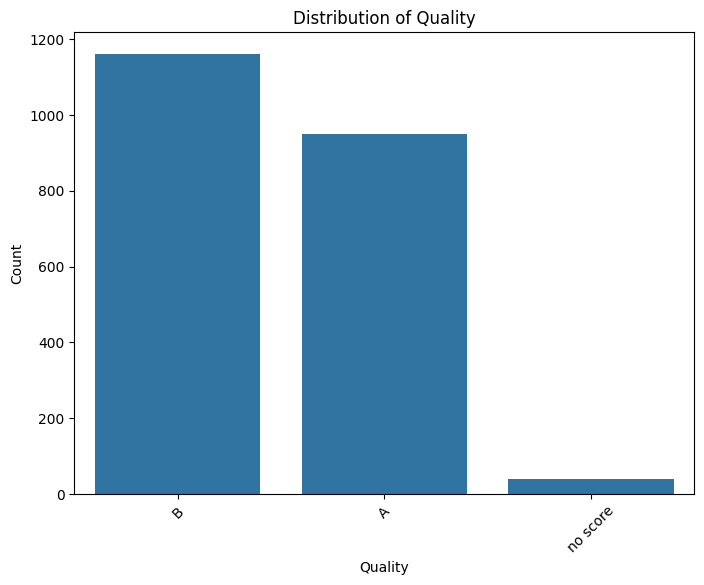

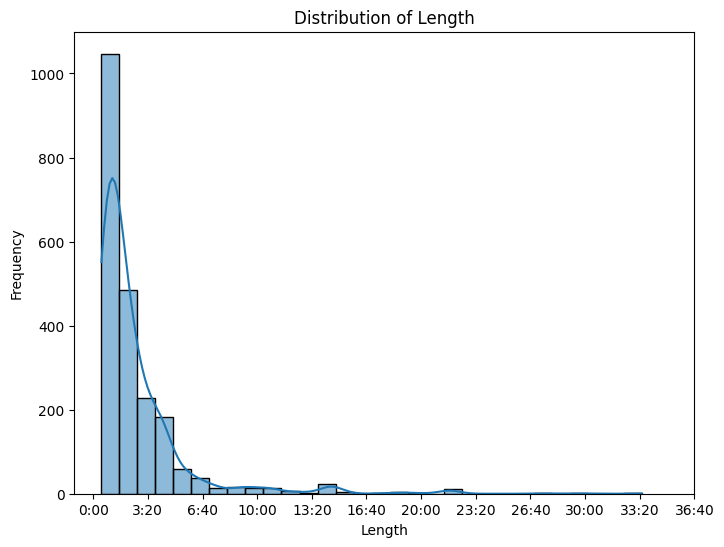

In [74]:
# Distribution of Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df, order=df['Quality'].value_counts().index)
plt.title('Distribution of Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Distribution of Length
plt.figure(figsize=(8, 6))
sns.histplot(df['Length_seconds'], bins=30, kde=True)
plt.title('Distribution of Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
max_length = int(df['Length_seconds'].max())
step = max(10, (max_length // 10))  # Ensure at least 10-second intervals
plt.xticks(ticks=range(0, max_length + step, step), labels=[f"{t//60}:{t%60:02d}" for t in range(0, max_length + step, step)])
plt.show()


In [75]:
# Geographic distribution of bird calls
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude', 
                     hover_name='English_name', 
                     title='Geographic Distribution of Bird Calls')
fig.update_geos(projection_type="natural earth")
fig.show()

In [ ]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df.dtypes

# plt.figure(figsize=(12,6))
# sns.countplot(x='Year', data=df)
# plt.title('Number of Bird Call Sightings per Year')
# plt.xticks(rotation=45)
# plt.xlabel('Year')
# plt.ylabel('Number of Sightings')
# plt.show()
df

AttributeError: Can only use .dt accessor with datetimelike values

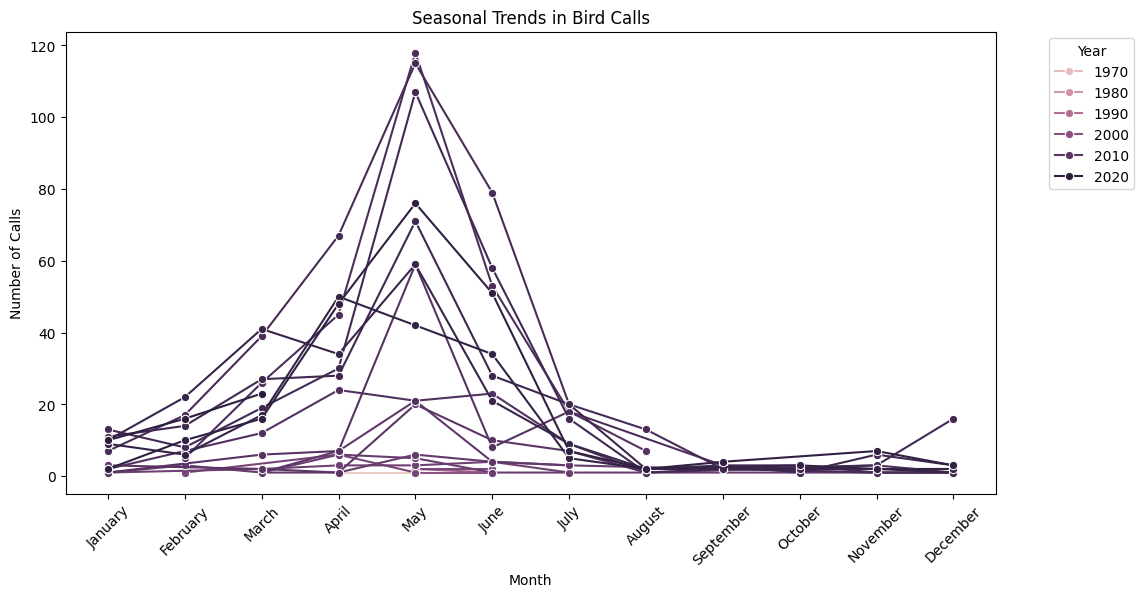

In [ ]:
# Seasonal trends in bird calls
seasonal_trend = df.groupby(['Year', 'Month']).size().reset_index(name='Call_Count')
plt.figure(figsize=(12, 6))
month_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
sns.lineplot(x='Month', y='Call_Count', hue='Year', data=seasonal_trend, marker='o')
plt.title('Seasonal Trends in Bird Calls')
plt.xlabel('Month')
plt.ylabel('Number of Calls')
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()